# Best Neighborhood in Pittsburgh

What's the best neighborhood in Pittsburgh? Asking around the city you're sure to get lots of different answers, all based on personal biases and experiences, but what is the **objectively** best neighborhood? That's what we seek to answer. 

Our group will be judging the best neighborhood in Pittsburgh based on overall livability. For this metric, we are looking at datasets on 311 requests, arrests, and playground sets in each neighborhood. Arrests will be weighted higher than the others because we beleive that's a bit more important for comfort and livability.

# Looking at 311 Data for Livability

For our metric of livability, I wanted to look at data on 311 requests to see how often each neighborhood has some sort of obstruction or infrastructure problem that needs taken care of. This data set includes reports on things like potholes, downed trees, cars parked in the middle of the street, etc. over the past 6 years. These type of things contribute to our idea of comfort and which neighborhoods would be the nicest to live in. For our purposes the neighborhoods with the least amound of 311 requests, will rank the highest. 

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline


req311 = pd.read_csv("https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4").dropna().sort_values("NEIGHBORHOOD") #Importing the data
Req311 = req311["NEIGHBORHOOD"].unique().tolist() #Create an array of all the neighborhoods

<AxesSubplot:xlabel='NEIGHBORHOOD'>

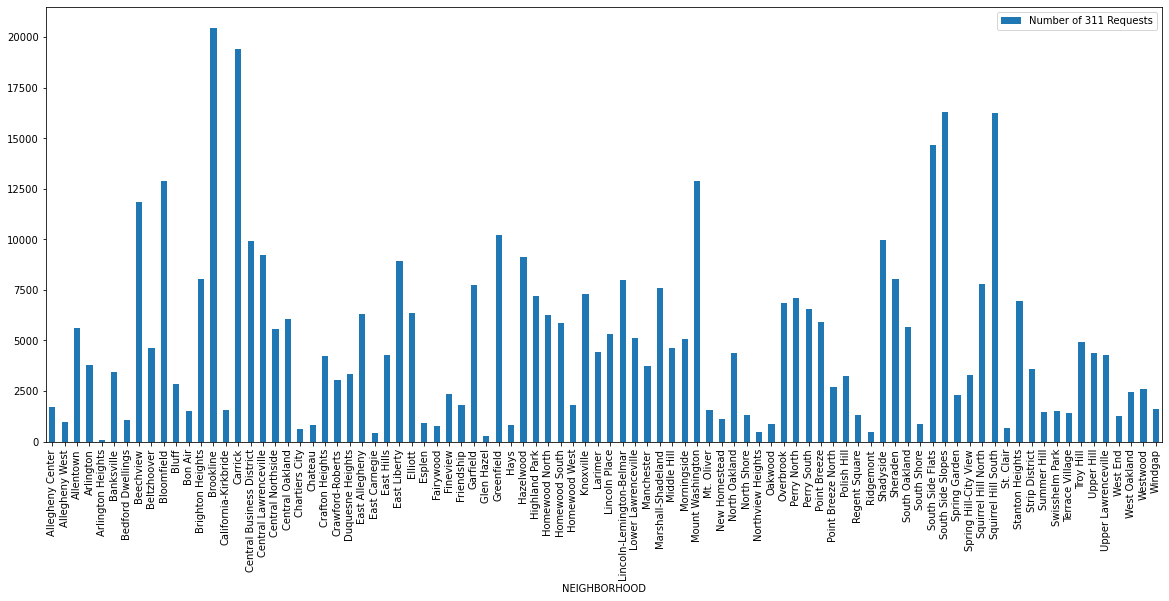

In [2]:
Total = [] #Making an array of size 90
for r in range(90):
    Total.append(0)
    
for r in range(len(req311)): #Counts the ammount of 311 requests per neighborhood
    neighborhood = req311.iloc[r,6] #Gets the neighborhood from each row in the dataframe
    i = Req311.index(neighborhood) #Finds that neighorhood in the Req311 array
    Total[i]+=1  #Adds to that neighborhoods total
    
ReqNum = [[]]  #Makes an empty 2d array
for i in range(90): #Make the data readable by pandas
    ReqNum[i].append(Req311[i]) #Add neighborhood to current row
    ReqNum[i].append(Total[i]) #Add 311 total to current row
    
    ReqNum.insert(i+1, []) #Add a new row at the end of each loop

del ReqNum[90] #Delete the extra row created at the end

Req311Total = pd.DataFrame(ReqNum, columns=["NEIGHBORHOOD", "Number of 311 Requests"])

Req311Total.plot.bar(x="NEIGHBORHOOD", figsize=(20,8))

# Review of the Data

After sorting and graphing the data, I came up with a scoring system where neighborhoods under 500 request get 5 points, then under 1000 requests get 3 points, 10000 requests 1 point, and anything else, 0 points.

In [3]:
Scores = Req311Total['Number of 311 Requests'].tolist()
ScoreList = []

for r in range(90): #Make an array for the scores
    ScoreList.append(0)
    
for r in range(90):  #Add scores for each neighborhood
    if Scores[r] < 100:
        ScoreList[r] = 5
    elif 100 < Scores[r] < 500:
        ScoreList[r] = 3
    elif 500 < Scores[r] < 1000:
        ScoreList[r] = 1
    else:
        ScoreList[r] = 0
ScoreNum = [[]]
for i in range(90) : #Rearrange the data
    ScoreNum[i].append(Req311[i])
    ScoreNum[i].append(ScoreList[i])
    
    ScoreNum.insert(i+1, [])
    
del ScoreNum[90] #delete the extra row created at the end of the loop

ReqScores = pd.DataFrame(ScoreNum, columns = ["NEIGHBORHOOD", "Score"])
ReqScores = ReqScores.sort_values("Score", ascending = False)

ReqScores.head(10)

,NEIGHBORHOOD,Score
4,Arlington Heights,5
26,East Carnegie,3
66,Ridgemont,3
35,Glen Hazel,3
57,Northview Heights,3
30,Esplen,1
70,South Shore,1
31,Fairywood,1
21,Chateau,1
20,Chartiers City,1



This table shows the top 10 neighborhoods by from this dataset. By this metric, Arlington Heights would be the best neighborhood, with a score of 5 points for being the only neighborhood under one hundred 311 requests.

# Police Incidents

In [4]:
import pandas as pd
incidents = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f").sort_values("INCIDENTNEIGHBORHOOD").dropna()
List = incidents["INCIDENTNEIGHBORHOOD"].unique().tolist()

count = []
for r in range(98):
    count.append(0)
for r in range(len(incidents)):
    hoodName = incidents.iloc[r,6]
    i = List.index(hoodName)
    count[i]+=1
num = [[]]
for i in range(98):
    num[i].append(List[i])
    num[i].append(count[i])
    num.insert(i+1, [])

del num[63]
del num[63]
del num[63]
del num[88]
del num[94]

pd.set_option("display.max_rows", None, "display.max_columns", None)
table = pd.DataFrame(num, columns=["Neighborhood", "Police Incidents since 2015"])
table.sort_values("Police Incidents since 2015", ascending = True)

,Neighborhood,Police Incidents since 2015
56,Mt. Oliver Boro,32
57,Mt. Oliver Neighborhood,77
21,Chartiers City,97
58,New Homestead,118
70,Ridgemont,144
27,East Carnegie,162
85,Swisshelm Park,185
39,Hays,190
54,Mount Oliver,200
84,Summer Hill,228


In [52]:
ScoresPol = table['Police Incidents since 2015'].tolist()
ScoreListP = []

for r in range(90): #Make an array for the scores
    ScoreListP.append(0)
    
for r in range(90):  #Add scores for each neighborhood
    if ScoresPol[r] < 50:
        ScoreListP[r] = 7
    elif 50 < ScoresPol[r] < 100:
        ScoreListP[r] = 4
    elif 100 < ScoresPol[r] < 1000:
        ScoreListP[r] = 2
    else:
        ScoreListP[r] = 0
ScoreNumP = [[]]
for i in range(90) : #Rearrange the data
    ScoreNumP[i].append(List[i])
    ScoreNumP[i].append(ScoreListP[i])
    
    ScoreNumP.insert(i+1, [])
    
del ScoreNumP[90] #delete the extra row created at the end of the loop

PolScores = pd.DataFrame(ScoreNumP, columns = ["NEIGHBORHOOD", "Score"])
PolScores = PolScores.sort_values("Score", ascending = False)

PolScores.head(10)

,NEIGHBORHOOD,Score
56,Mt. Oliver Boro,7
21,Chartiers City,4
57,Mt. Oliver Neighborhood,4
89,Terrace Village,2
36,Glen Hazel,2
73,Ridgemont,2
70,Point Breeze North,2
31,Esplen,2
32,Fairywood,2
33,Fineview,2


# Playgrounds

Playground is a good measure of overall livability. Because people can relax in here, and they can also bring children to play. At the same time, the facilities and quantity of the playground can also reflect the economic aspect and entertainment methods of the neighborhoods. If there are far more playgrounds in one neighborhood than another, it can indicate that the neighborhood is more concerned about people's entertainment and life.

This database contains playgrounds in all neighborhoods in Pittsburgh and can show me various attributes of playgrounds. We first remove all playgrounds that contain null, because no matter which piece of information is missing (especially fire zone, police zone, safe surface type), the playground will look unsafe. After this, we remove some columns that are not relevant to the best community.

In [6]:
pe = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")
pe = pe.dropna()
pdd = pe.drop(columns=['name', 'id','street',"street_number","tract","public_works_division","fire_zone","police_zone","pli_division","manufacturer","council_district","latitude","longitude","safety_surface_type","equipment_type"])
pdd.head()

,ada_accessible,neighborhood,ward
0,f,Beechview,19
1,f,Allegheny Center,22
2,f,Squirrel Hill South,14
5,f,Windgap,28
6,t,Windgap,28


A simple huge database can't reflect anything. We now find the 10 societies with the most playgrounds.

In [7]:
count_play = pdd['neighborhood'].value_counts()
count_play = count_play.to_frame()
count_play.head(10)

,neighborhood
Allegheny Center,13
South Side Slopes,10
Mount Washington,10
Squirrel Hill South,9
Beechview,9
Elliott,9
Beltzhoover,9
Sheraden,9
Regent Square,8
Hazelwood,7


In [8]:
best_n = [
    {"Neighborhood":"Allegheny Center", "playground number": 13},
    {"Neighborhood":"Mount Washington", "playground number": 10},
    {"Neighborhood":"South Side Slopes", "playground number":10},
    {"Neighborhood":"Beltzhoover", "playground number":9},
    {"Neighborhood":"Elliott", "playground number":9},
    {"Neighborhood":"Beechview", "playground number":9},
    {"Neighborhood":"Sheraden", "playground number":9},
    {"Neighborhood":"Squirrel Hill South", "playground number":9},
    {"Neighborhood":"Regent Square", "playground number":8},
    {"Neighborhood":"Bloomfield", "playground number":7},
]
# create a DataFrame from a list of dictionaries
w = pd.DataFrame(best_n)

Next, we use plot to better observe the number of 10 playgrounds.

In [9]:
x = w["Neighborhood"]
y = w["playground number"]
plt.barh(x, y)
plt.show()

NameError: name 'plt' is not defined

We cannot judge the best neighborhoods based on the number of playgrounds alone. We should consider the number of ward in each playground. Such data can better reflect the overall situation.

In [ ]:
query_mask = pdd['neighborhood'] == "Allegheny Center"
chicken_bowls = pdd[query_mask]
n1 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Mount Washington"
chicken_bowls = pdd[query_mask]
n2 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "South Side Slopes"
chicken_bowls = pdd[query_mask]
n3 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Beltzhoover"
chicken_bowls = pdd[query_mask]
n4 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Elliott"
chicken_bowls = pdd[query_mask]
n5 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Beechview"
chicken_bowls = pdd[query_mask]
n7 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Sheraden"
chicken_bowls = pdd[query_mask]
n8 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Squirrel Hill South"
chicken_bowls = pdd[query_mask]
n9 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Regent Square"
chicken_bowls = pdd[query_mask]
n6 = sum(chicken_bowls['ward'])/15

query_mask = pdd['neighborhood'] == "Bloomfield"
chicken_bowls = pdd[query_mask]
n10 = sum(chicken_bowls['ward'])/15
labels = ['Allegheny Center', 'Mount Washington', 'South Side Slopesn', 'Beltzhoover', "Elliott","Beechview","Sheraden",'Squirrel Hill South',"Regent Square","Bloomfield"] 
   
mine = [13, 10, 10, 9,9,9,9,9,8,7] 
others = [n1, n2, n3, n4,n5,n6,n7,n8,n9,n10]  
width = 0.5
fig, ax = plt.subplots() 
ax.barh(labels, mine, width,   
        label ='Playground') 
ax.barh(labels, others, width,  
        left = mine,  
        label ='Wards') 
ax.set_xlabel('playground amount plus the ward amount') 
ax.legend() 
ax.set_title('Best Neighborhoods with playground condition') 
plt.show()

In [78]:
score = [
    {"Neighborhood":"Allegheny Center", "score": 5},
    {"Neighborhood":"Mount Washington", "score": 3},
    {"Neighborhood":"South Side Slopes", "score":3},
    {"Neighborhood":"Elliott", "score":3 },
    {"Neighborhood":"Sheraden", "score":3},
    {"Neighborhood":"Squirrel Hill South", "score":3 },
    {"Neighborhood":"Regent Square", "score":1 },
    {"Neighborhood":"Bloomfield", "score":1 },
    {"Neighborhood":"Beltzhoover", "score":1},
    {"Neighborhood":"Beechview", "score":1 },
]
best = pd.DataFrame(score)
best

,Neighborhood,score
0,Allegheny Center,5
1,Mount Washington,3
2,South Side Slopes,3
3,Elliott,3
4,Sheraden,3
5,Squirrel Hill South,3
6,Regent Square,1
7,Bloomfield,1
8,Beltzhoover,1
9,Beechview,1


In [79]:
ReqSco = ReqScores["Score"].tolist()
PolSco = PolScores["Score"].tolist()
PlaySco = best["score"].tolist()

R311Score = []

for r in range(90):
    R311Score.append(ReqSco[r])
    

PScore = []

for r in range(90):
    PScore.append(PolSco[r])
    

BScore = []

for r in range(90):
    BScore.append(0)
    
for r in range(len(best)):
    n = best.iloc[r, 0]
    i = Req311.index(n)
    BScore[i] = best.iloc[r, 1]
    

TotalScores = [[]]

for i in range(90):
    TotalScores[i].append(Req311[i])
    TotalScores[i].append(R311Score[i])
    TotalScores[i].append(PScore[i])
    TotalScores[i].append(BScore[i])
    
    TotalScores.insert(i+1, [])
    
del TotalScores[90] #delete the extra row created at the end of the lo



FinalScores = pd.DataFrame(TotalScores, columns = ["NEIGHBORHOOD", "311 Score", "Arrest Score", "Playground Score"])
FinalScores["Sum"] = FinalScores.sum(axis=1)


FinalScores.sort_values(by="Sum", ascending = True).head(10)

,NEIGHBORHOOD,311 Score,Arrest Score,Playground Score,Sum
98,Windgap,0.0,0.0,NaN,0.0
77,Shadyside,0.0,0.0,NaN,0.0
75,Regent Square,0.0,0.0,NaN,0.0
74,Polish Hill,0.0,0.0,NaN,0.0
73,Point Breeze North,0.0,0.0,NaN,0.0
72,Point Breeze,0.0,0.0,NaN,0.0
71,Perry South,0.0,0.0,NaN,0.0
70,Perry North,0.0,0.0,NaN,0.0
69,Overbrook,0.0,0.0,NaN,0.0
66,North Shore,0.0,0.0,NaN,0.0


# Conclusion:

   Our groups overall metric for the best neighborhood in Pittsburgh was "livability". After reviewing all of the data and totaling up the scores, the best neighborhood was Mount Oliver Borough, at 9 points, with Allegheny Center and Arlington Heights coming in at second both with 8 points. The real deciding factor was the section on arrest data, which we weighted heavier since we felt it was more important than 311 data or the ammount of playgrounds in a neighborhood when it came to livablity.
   
   The best neighborhood in Pittsburgh, is **Mount Oliver Borough**

![new year](https://www.johnsonbanks.co.uk/content/projects/livability-1.jpg)